In [29]:
import numpy as np
import cmath

In [83]:
def newton_method_grid(func, func_derivative, grid, roots, tolerance=1e-10, max_iterations=100):
    
    classifications = np.zeros_like(grid, dtype=int)
    convergence_rates = np.zeros_like(grid, dtype=float)
    found_roots = np.zeros_like(grid, dtype=complex)
    
    for i, z0 in np.ndenumerate(grid):
        zn = z0
        for n in range(max_iterations):
            zn1 = zn - func(zn) / func_derivative(zn)
            if abs(zn1 - zn) < tolerance:
                convergence_rates[i] = n
                
                min_distance = np.inf
                closest_root_index = -1
                for root_index, root in enumerate(roots):
                    distance = abs(zn1 - root)
                    if distance < min_distance:
                        min_distance = distance
                        closest_root_index = root_index
                classifications[i] = closest_root_index

                found_roots[i] = zn1
                break
            zn = zn1
    
    return classifications, convergence_rates, found_roots

In [98]:
def func(z):
    return z**3 - 1

def func_derivative(z):
    return 3 * z**2

known_roots = [1, -0.5 + 0.5j * 3**0.5, -0.5 - 0.5j * 3**0.5]

x_min, x_max = -4, 4
y_min, y_max = -4, 4
resolution = 400

x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)
grid = X + 1j * Y

classifications, convergence_rates, found_roots = newton_method_grid(func, func_derivative, grid, known_roots)

In [99]:
print(found_roots)

[[-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 ...
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]]


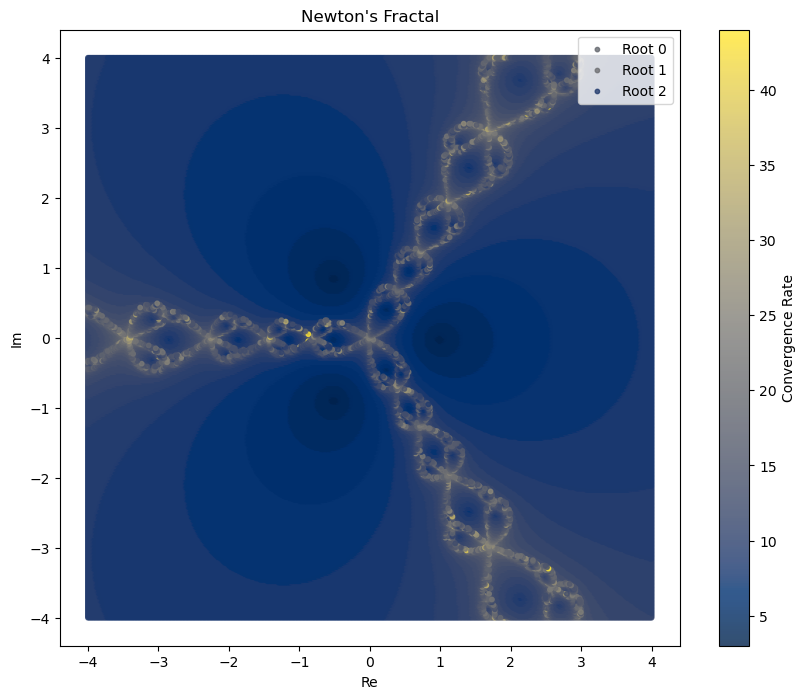

In [100]:
# Визуализируем результаты
plt.figure(figsize=(10, 8))

# Рисуем множество Ньютона
for root_index, root in enumerate(known_roots):
    mask = (classifications == root_index)
    plt.scatter(grid[mask].real, grid[mask].imag, c=convergence_rates[mask], cmap='cividis', s=10, alpha=0.8, label=f'Root {root_index}')

plt.colorbar(label='Convergence Rate')
plt.title("Newton's Fractal")
plt.xlabel('Re')
plt.ylabel('Im')
plt.legend()
plt.show()